In [3]:
#pip install selenium
#pip install webdriver-manager
#pip install BeautifulSoup4
import pandas as pd
import numpy as np
import re
import requests
import webbrowser
import seaborn as sns
import urllib.request, json 
import matplotlib.pyplot as plt
import math
from IPython.core.display import display, HTML
from itertools import chain
from datetime import date
from bs4 import BeautifulSoup
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
#from selenium.webdriver.firefox.firefox_binary import FirefoxBinary
from selenium import webdriver
from datetime import datetime, date, timedelta
pd.set_option("display.max.columns", None)
pd.set_option("display.max.rows", None)
#driver = webdriver.Chrome("C:/Users/Valentin/Documents/Winamax/chromedriver")
driver = webdriver.Chrome(ChromeDriverManager().install())

#Function Soup
def get_page(special_match):
    driver.get(special_match)
    try:
        element = driver.find_element_by_class_name('banner-actions-container')
        element.click()
    except:
        do = "Nothing"
            
def second_largest(numbers):
    count = 0
    m1 = m2 = float('-inf')
    for x in numbers:
        count += 1
        if x > m2:
            if x >= m1:
                m1, m2 = x, m1            
            else:
                m2 = x
    return m2 if count >= 2 else None

def second_lowest(numbers):
    count = 0
    m1 = m2 = float('+inf')
    for x in numbers:
        count += 1
        if x < m2:
            if x <= m1:
                m1, m2 = x, m1            
            else:
                m2 = x
    return m2 if count >= 2 else None

def NPerf(typ ,mini):
    if mini<3:
        return("0")
    else:
        if mini<5:
            return("3")
        else:
            if mini<7:
                return("5")
            else:
                if mini<10:
                    return("7")
                else:
                    if mini<13:
                        return("10")
                    else:
                        if typ == "AST":
                            return("10")
                        if mini<15:
                            return("13")
                        else:
                            return("15")



====== WebDriver manager ======
Current google-chrome version is 96.0.4664
Get LATEST driver version for 96.0.4664
Driver [C:\Users\Valentin\.wdm\drivers\chromedriver\win32\96.0.4664.45\chromedriver.exe] found in cache


In [4]:
URL_prefix = "https://www.unibet.fr/zones/v3/sportnode/markets.json?nodeId=627956958&filter="

Spe_Joueurs = ["Sp%25C3%25A9cial%2520joueurs&marketname=Performance%2520du%2520Joueur%2520(Points%2520%252B%2520Rebonds%2520%252B%2520Passes)",  #Pts+Reb+Ast
               "Sp%25C3%25A9cial%2520joueurs&marketname=Performance%2520du%2520Joueur%2520(Points%2520%252B%2520Rebonds)", #Pts+Reb
               "Sp%25C3%25A9cial%2520joueurs&marketname=Performance%2520du%2520Joueur%2520(Points%2520%252B%2520Passes)",  #Pts+Ast
               "Sp%25C3%25A9cial%2520joueurs&marketname=Performance%2520du%2520Joueur%2520(Passes%2520%252B%2520Rebonds)", #Reb+Ast
               "Sp%25C3%25A9cial%2520joueurs&marketname=Nombre%2520de%2520rebonds%2520du%2520joueur", #Reb
               "Sp%25C3%25A9cial%2520joueurs&marketname=Nombre%2520de%2520passes%2520du%2520joueur", #Ast
               "Sp%25C3%25A9cial%2520joueurs&marketname=Nombre%2520de%2520paniers%2520%25C3%25A0%25203%2520points%2520du%2520joueur", #NB3Pts
               "Scoreurs&marketname=Joueur%2520marquant%252020%2520points%2520ou%2520plus", #20PTS
               "Scoreurs&marketname=Joueur%2520marquant%252025%2520points%2520ou%2520plus", #25PTS
               "Scoreurs&marketname=Joueur%2520marquant%252030%2520points%2520ou%2520plus", #30PTS
               "Scoreurs&marketname=Joueur%2520marquant%252035%2520points%2520ou%2520plus", #35PTS
               "Scoreurs&marketname=Joueur%2520marquant%252040%2520points%2520ou%2520plus",  #40PTS
               "Sp%25C3%25A9cial%2520joueurs&marketname=Joueur%2520prenant%25203%2520rebonds%2520ou%2520plus",  #3REB+
               "Sp%25C3%25A9cial%2520joueurs&marketname=Joueur%2520prenant%25205%2520rebonds%2520ou%2520plus",  #5REB+
               "Sp%25C3%25A9cial%2520joueurs&marketname=Joueur%2520prenant%25207%2520rebonds%2520ou%2520plus",  #7REB+
               "Sp%25C3%25A9cial%2520joueurs&marketname=Joueur%2520prenant%252010%2520rebonds%2520ou%2520plus",  #10REB+
               "Sp%25C3%25A9cial%2520joueurs&marketname=Joueur%2520prenant%252013%2520rebonds%2520ou%2520plus",  #13REB+
               "Sp%25C3%25A9cial%2520joueurs&marketname=Joueur%2520prenant%252015%2520rebonds%2520ou%2520plus",  #15REB+
               "Sp%25C3%25A9cial%2520joueurs&marketname=Joueur%2520r%25C3%25A9alisant%25203%2520passes%2520ou%2520plus",  #3AST+
               "Sp%25C3%25A9cial%2520joueurs&marketname=Joueur%2520r%25C3%25A9alisant%25205%2520passes%2520ou%2520plus",  #5AST+
               "Sp%25C3%25A9cial%2520joueurs&marketname=Joueur%2520r%25C3%25A9alisant%25207%2520passes%2520ou%2520plus",  #7AST+
               "Sp%25C3%25A9cial%2520joueurs&marketname=Joueur%2520r%25C3%25A9alisant%252010%2520passes%2520ou%2520plus", #10AST+
              ]
Spe_Joueurs_indx = ["PTS_REB_AST", "PTS_REB"
                    , "PTS_AST", "REB_AST", "REB", "AST", "NB3PTS", "20PTS", "25PTS", "30PTS", "35PTS", "40PTS"
                    ,"3REB+","5REB+","7REB+","10REB+","13REB+","15REB+","3AST+","5AST+","7AST+","10AST+"
                   ]



#print("------------- " + str(int(len(list_Pages)/2)) + " games" + " ------------")
print("------------ Odds for ------------")
df2 = pd.DataFrame()
i_match = 1

for b in range(len(Spe_Joueurs_indx)):
    u = URL_prefix+Spe_Joueurs[b]
    with urllib.request.urlopen(u) as url:
        json_data = json.loads(url.read().decode())
        
    row_data = []  
    if json_data['singleSportId'] != None:
        for d in json_data['marketsByType'][0]['days']:
            for e in d['events']:
                match = e['eventName']
                nb = 0
                for j in e['markets'][0]['selections']:
                    if(j['name'].find("Moins") == -1):
                        nb = nb+1
                        if(b == 0 and j == e['markets'][0]['selections'][len(e['markets'][0]['selections'])-1]): 
                            print(str(i_match) + " " + match + " (" + str(nb) + " players)")
                            i_match = i_match + 1
                        if(b<7): #from 20PTS
                            data_item = {"Player": j['name'].split(" - ")[0],
                                         "Match": match,
                                         Spe_Joueurs_indx[b]:[int(s) for s in j['name'].split(" - ")[1].replace(".","").replace(",","").split() if s.isdigit()][0]/10,
                                         "Odd+"+Spe_Joueurs_indx[b]:round(1+float(j['currentPriceUp'])/float(j['currentPriceDown']),2),
                                         "Odd-"+Spe_Joueurs_indx[b]:OddMoins,                                         
                                        }
                        else:
                            if(b<12):
                                data_item = {"Player": j['name'].split(" - ")[0],
                                             "Match": match,
                                             "Odd"+Spe_Joueurs_indx[b]:round(1+float(j['currentPriceUp'])/float(j['currentPriceDown']),2)                         
                                            }
                            else:
                                data_item = {"Player": j['name'].split(" - ")[0],
                                             "Match": match,
                                             "Odd"+Spe_Joueurs_indx[b]:round(1+float(j['currentPriceUp'])/float(j['currentPriceDown']),2)
                                            }
                        row_data.append(data_item)
                    else:
                        OddMoins = round(1+float(j['currentPriceUp'])/float(j['currentPriceDown']),2)
        data = pd.DataFrame(row_data)
        if b == 0:
            df2 = data
        else:
            df2 = df2.merge(data, on=['Match','Player'], how='outer')
df2["name"] = df2["Player"].apply(lambda p: p.replace("-", "").replace("'", "").replace(".", "").lower())
df2["id"] = date.today().strftime("%d/%m/%Y") + df2["name"] 

#Errors one the names
df2["FullName"] = df2["name"]#.apply(lambda p: p.replace(" ", ""))
df2["FullName"] = df2["FullName"].apply(lambda p: "maurice harkless" if p == "moe harkless" else p)
df2["FullName"] = df2["FullName"].apply(lambda p: "robertwilliamsiii" if p == "robert williams" else p)
df2["name"] = df2["FullName"]

name = df2["name"]
df2 = df2.drop("name", axis=1)

#Save odds as CSV
csv = pd.read_csv("Odds_NBA.csv")
def bool(p):
    if any(csv['id'].str.contains(str(p))):
        return(False)
    else:
        return(True)

b = df2.apply(lambda p : bool(p["id"]), axis=1)
csv = pd.concat([csv,df2[b]]).sort_values(["FullName", 'id'])

csv.to_csv('Odds_NBA.csv', index=False, encoding='utf-8')
#Remove date
#csv = pd.read_csv("Odds_NBA.csv")
#csv = csv[csv["id"].apply(lambda p : "04/11/2021" not in p)]
#csv.to_csv('Odds_NBA.csv', index=False, encoding='utf-8')
df2["FullName"] = name.apply(lambda p: p.replace(" ", ""))

------------ Odds for ------------
1 Charlotte Hornets - Sacramento (6 players)
2 Indiana Pacers - Dallas Mavericks (12 players)
3 Atlanta Hawks - Brooklyn Nets (10 players)
4 Toronto Raptors - New York Knicks (12 players)
5 Houston Rockets - Milwaukee Bucks (10 players)
6 Minnesota Timberwolves - Cleveland Cavaliers (12 players)
7 New Orleans Pelicans - Detroit Pistons (10 players)
8 Phoenix Suns - Boston Celtics (10 players)


In [5]:
# To take in account : interruption in the dates
# Players missing

Players = pd.read_csv("Players_NBA.csv")
final = df2.merge(Players, on=["FullName"], how='left')
#final.head()

In [9]:
Stats = ["PTS_REB_AST", "PTS_REB", "PTS_AST", "REB_AST", "REB", "AST", "NB3PTS"]
j=0
for player in final["URL"]:
    #print(player)
    get_page(player.replace("/player/_/id/","/player/gamelog/_/id/"))
    soup = BeautifulSoup(driver.page_source)

    history = soup.find(class_ = "gamelog br-4 pa4 mb3 bg-clr-white").findAll(class_ ='events_table')
    if(len(history)>1):
        history = history[:-1]
    else:
        print("Problem with " + player)
        
    table_data = []
    for h in history:
        for row in h.find(class_ = "Table__TBODY").findAll('tr'):
            row_data = []
            for cell in row.findAll('td'):
                row_data.append(cell.text)

            if (not row_data[1][:1].isdigit()):
                data_item = {"DATE": row_data[0],
                             "OPP": row_data[1].replace("vs","").replace("@",""),
                             "Result": row_data[2],
                             "MIN": row_data[3],

                             "2PTw": float(row_data[4].split("-")[0]) - float(row_data[6].split("-")[0]),
                             "2PTa": float(row_data[4].split("-")[1]) - float(row_data[6].split("-")[1]),
                             "2PT%": 100 if (float(row_data[4].split("-")[1]) - float(row_data[6].split("-")[1])) == 0 else round((float(row_data[4].split("-")[0]) - float(row_data[6].split("-")[0]))/
                                           (float(row_data[4].split("-")[1]) - float(row_data[6].split("-")[1])),3)*100,

                             "3PTw": row_data[6].split("-")[0],
                             "3PTa": row_data[6].split("-")[1],
                             "3PT%": row_data[7],

                             "FTw": row_data[8].split("-")[0],
                             "FTa": row_data[8].split("-")[1],
                             #"FT%": row_data[9],

                             "REB": int(row_data[10]),
                             "AST": int(row_data[11]),
                             "BLK": row_data[12],

                             "STL": row_data[13],
                             "PF": row_data[14],
                             "TO": row_data[15],
                             "PTS": int(row_data[16]),
                             "Home": 0 if ("@" in row_data[1]) else 1,
                             "Extra_Time": 1 if ("OT" in row_data[2]) else 0,
                             "Win": 1 if ("W" in row_data[2]) else 0,
                             "ScoreTeam": re.sub("[A-Za-z]+", "",row_data[2]).strip().split("-")[0 if ("W" in row_data[2]) else 1],
                             "ScoreOpponent": re.sub("[A-Za-z]+", "",row_data[2]).strip().split("-")[1 if ("W" in row_data[2]) else 0],


                             "PTS_REB_AST": int(float(row_data[16])+float(row_data[10])+float(row_data[11])),
                             "PTS_AST": int(float(row_data[16])+float(row_data[11])),
                             "PTS_REB": int(float(row_data[16])+float(row_data[10])),
                             "REB_AST": int(float(row_data[10])+float(row_data[11])),
                             "NB3PTS": int(row_data[6].split("-")[0]),
                            }
                table_data.append(data_item)
            
    history_player = pd.DataFrame(table_data)
    d = final[final['URL'].str.contains("/" + player.split("/")[player.split("/").index('id')+1] + "/")]
    
    table_data = {}
    for i in Stats:
        t = np.arange(len(history_player))
        weight = np.exp(-0.12*t)
        #np.average((history_player[i]>d[i].values[0]), weights=weight)
        data_item = {#"prop_"+i: math.nan if math.isnan(d[i].values[0]) else round((history_player[i]>d[i].values[0]).mean(),2),
                     "prop_"+i: math.nan if math.isnan(d[i].values[0]) else round((((history_player[i]>d[i].values[0]) * weight)/(sum(weight)/len(weight))).mean(),2),
                     "zodd-"+i:d["Odd-"+i].values[0],
                     "zodd+"+i:d["Odd+"+i].values[0]
                    }
        #data_item = {"prop_"+i: (history_player[i]>d[i].values[0]).mean()}
        table_data.update(data_item)

    dd = pd.DataFrame({player: table_data}).T
    if j == 0:
        res = dd
    else:
        res = res.append(dd)
    j=j+1
    
res = res.reset_index(drop=False)

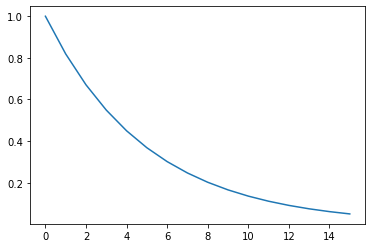

In [20]:
t = np.arange(len(history_player))
weight = np.exp(-0.20*t)
import matplotlib.pyplot as plt
plt.plot(t,weight)

In [10]:
def make_clickable(val):
    if (isinstance(val, str) and val.find("http") != -1):
        return '<a href="{}">{}</a>'.format(val,val.split("id/")[1].split("/")[1]).replace("player/", "player/gamelog/")
    else:
        return val
        
threshold = 0.85
a = res.iloc[0]
res['res'] = res.apply(lambda a: int(a["prop_"+Stats[0]]>=threshold) + int(a["prop_"+Stats[1]]>=threshold) + int(a["prop_"+Stats[2]]>=threshold) + int(a["prop_"+Stats[3]]>=threshold) + int(a["prop_"+Stats[4]]>=threshold) + int(a["prop_"+Stats[5]]>=threshold) + int(a["prop_"+Stats[6]]>=threshold) + int(a["prop_"+Stats[0]]<=(1-threshold)) + int(a["prop_"+Stats[1]]<=(1-threshold)) + int(a["prop_"+Stats[2]]<=(1-threshold)) + int(a["prop_"+Stats[3]]<=(1-threshold)) + int(a["prop_"+Stats[4]]<=(1-threshold)) + int(a["prop_"+Stats[5]]<=(1-threshold)) + int(a["prop_"+Stats[6]]<=(1-threshold)), axis=1)
r = res[res["res"]>0]
r.style.format(make_clickable)

,index,prop_AST,prop_NB3PTS,prop_PTS_AST,prop_PTS_REB,prop_PTS_REB_AST,prop_REB,prop_REB_AST,zodd+AST,zodd+NB3PTS,zodd+PTS_AST,zodd+PTS_REB,zodd+PTS_REB_AST,zodd+REB,zodd+REB_AST,zodd-AST,zodd-NB3PTS,zodd-PTS_AST,zodd-PTS_REB,zodd-PTS_REB_AST,zodd-REB,zodd-REB_AST,res
5,nick-richards,0.29,nan,0.11,0.11,0.11,0.0,0.11,1.41,nan,1.9,1.78,1.78,1.74,1.7,2.55,nan,1.74,1.84,1.84,1.88,1.94,5
10,myles-turner,0.13,0.56,0.55,0.61,0.61,0.44,0.41,2.55,1.78,1.8,1.78,1.76,1.94,1.8,1.41,1.84,1.82,1.86,1.88,1.7,1.82,1
27,timothe-luwawu-cabarrot,0.31,0.34,0.25,0.25,0.25,0.12,0.12,2.15,1.7,1.86,1.86,1.9,1.94,1.72,1.58,1.94,1.76,1.78,1.7,1.7,1.92,2
30,pascal-siakam,0.67,0.37,0.71,0.71,1.0,0.67,0.67,1.82,2.05,1.78,1.84,1.76,1.64,1.74,1.8,1.64,1.86,1.78,1.86,2.1,1.9,1
37,nerlens-noel,1.0,nan,0.47,0.53,0.53,0.53,0.53,1.64,nan,1.82,1.76,1.78,1.94,1.96,2.05,nan,1.8,1.88,1.84,1.7,1.68,1
48,khris-middleton,0.58,0.45,0.66,0.64,0.7,0.8,0.91,1.84,2.25,1.78,1.76,1.8,1.7,1.88,1.78,1.52,1.84,1.88,1.82,1.92,1.74,1
53,jarrett-allen,0.66,0.03,0.68,0.61,0.61,0.62,0.58,1.58,6.0,1.88,1.86,1.84,1.68,1.7,2.15,1.06,1.76,1.9,1.78,1.96,1.94,1
61,ricky-rubio,0.63,0.35,0.39,0.38,0.38,0.87,0.7,1.62,1.94,1.76,1.78,1.76,1.66,1.66,2.1,1.7,1.88,1.84,1.86,1.98,1.98,1
68,isaiah-stewart,0.75,0.02,0.38,0.5,0.48,0.68,0.59,1.41,4.2,1.72,1.76,1.76,1.7,1.92,2.55,1.15,1.9,1.86,1.88,1.94,1.72,1
78,landry-shamet,0.63,0.34,0.16,0.11,0.16,0.22,0.43,1.52,1.92,1.86,1.82,1.8,2.1,1.94,2.25,1.72,1.76,1.8,1.82,1.62,1.7,1


In [56]:
#r["index"].values in final["URL"]

In [6]:
table_data = []
macro = pd.read_csv("Teams_NBA.csv")
for i in range(0,len(history_player)):
    macro[macro["id"]== history_player["OPP"][i].lower()]
    if(history_player["Home"][i]==1):
        opp = macro[macro["id"]== history_player["OPP"][i].lower()]
        opp = opp[opp["Place"]=="Away"]
    else:
        opp = macro[macro["id"]== history_player["OPP"][i].lower()]
        opp = opp[opp["Place"]=="Home"]

    #opp['col'] = 'opp' + opp['col'].astype(str)
    data_item = opp.rename(columns={'PTS': 'PTSopp', 'OR': 'ORopp', 'DR': 'DRopp'})[['PTSopp', 'ORopp', 'DRopp']]
    
    if i == 0:
        table_data = pd.DataFrame(data_item)
    else:
        table_data = table_data.append(pd.DataFrame(data_item))
table_data
history_player = pd.concat([history_player.reset_index(drop=True), table_data.reset_index(drop=True)], axis=1)

In [692]:
history_player.head()

,DATE,OPP,Result,MIN,2PTw,2PTa,2PT%,3PTw,3PTa,3PT%,FTw,FTa,REB,AST,BLK,STL,PF,TO,PTS,Home,Extra_Time,Win,ScoreTeam,ScoreOpponent,PTS_REB_AST,PTS_AST,PTS_REB,REB_AST,NB3PTS
0,Fri 11/19,CLE,W104-89,35,6.0,11.0,54.5,9,16,56.3,1,1,4,6,0,2,4,3,40,0,0,1,104,89,50,46,44,10,9
1,Wed 11/17,BKN,W117-99,29,3.0,5.0,60.0,9,14,64.3,4,4,7,5,1,2,4,2,37,0,0,1,117,99,49,42,44,12,9
2,Mon 11/15,CHA,L106-102,36,4.0,9.0,44.4,3,13,23.1,7,7,6,10,1,3,2,3,24,0,0,0,102,106,40,34,30,16,3
3,Sat 11/13,CHI,W119-93,34,6.0,7.0,85.7,9,17,52.9,1,1,4,5,1,1,1,6,40,1,0,1,119,93,49,45,44,9,9
4,Thu 11/11,MIN,W123-110,34,5.0,7.0,71.4,3,9,33.3,6,8,5,6,0,1,2,3,25,1,0,1,123,110,36,31,30,11,3
